In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from config import get_cfg
from op import Operation

cfg = get_cfg()

operation = Operation(cfg)

2020-03-15 21:45:58,553 - /home/zhengtao/Segmentation/BrainSeg/config.py[line:71] - INFO: config:
exp_dir: ./exp
epochs: 128
lr: 0.0001
weight_decay: 0.0005
momentum: 0.9
epsilon: 1e-08
dropout: False
is_class_weight: True
data_name: CW-brains18
n_classes: 9
batch_size: 10
num_workers: 8
folders: ['1', '5', '7', '4', '148', '070', '14']
val_folds: ['1']
train_folds: ['5', '7', '4', '148', '070', '14']
memory_gpu: [10218, 601, 5662, 1107, 9655, 790, 1105, 8173]
device: cuda:0
cur_dir: ./exp/CW-brains18=0315-214555
model_path: ./exp/CW-brains18=0315-214555/model.pt
log_path: ./exp/CW-brains18=0315-214555/exp.log
log: <Logger ./exp/CW-brains18=0315-214555/exp.log (DEBUG)>

2020-03-15 21:46:01,231 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:52] - CRITICAL: class_weight: 
[0.001041085022250209, 0.013124356101379308, 0.22720382727779218, 0.018686577104176226, 0.25830903808412736, 0.01648522145115909, 0.1532046263608861, 0.053449694712797244, 0.25849557388543243]
2020-03-15 21:46:01,233

In [2]:
operation.load(path='./exp/CW-brains18=0315-163137/model.pt')

2020-03-15 17:11:52,848 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:73] - INFO: Model loaded from ./exp/CW-brains18=0315-163137/model.pt


In [3]:
operation.fit()

Seg/op.py[line:163] - INFO: Class     : ['  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8']
2020-03-15 17:32:08,229 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:164] - INFO: Train dice: [0.995, 0.934, 0.982, 0.928, 0.932, 0.871, 0.970, 0.981, 0.986]
2020-03-15 17:32:08,230 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:165] - INFO: Val   dice: [0.993, 0.712, 0.837, 0.658, 0.585, 0.747, 0.907, 0.830, 0.935]
2020-03-15 17:32:08,308 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:168] - INFO: Model saved at ./exp/CW-brains18=0315-171125/model.pt
2020-03-15 17:32:08,310 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:152] - INFO: [Epoch 110/128]
[  29/  29] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| \
2020-03-15 17:32:19,318 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:160] - INFO: Train Loss: 0.0776
2020-03-15 17:32:19,321 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:161] - INFO: Val   Loss: 0.3503
2020-03-15 17:32:19,322 - /home/zhengtao/S

In [4]:
def show_result(data, ids):
    for i in ids:
        operation.predict(data[i][2], data[i][3])

In [2]:
# operation.load(path=cfg.model_path)
# operation.load(path='./exp/brains18=0313-183958/model.pt')
operation.load(path='./exp/dropout-brains18=0315-111313/model.pt')


2020-03-15 21:46:25,545 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:69] - INFO: Model loaded from ./exp/dropout-brains18=0315-111313/model.pt


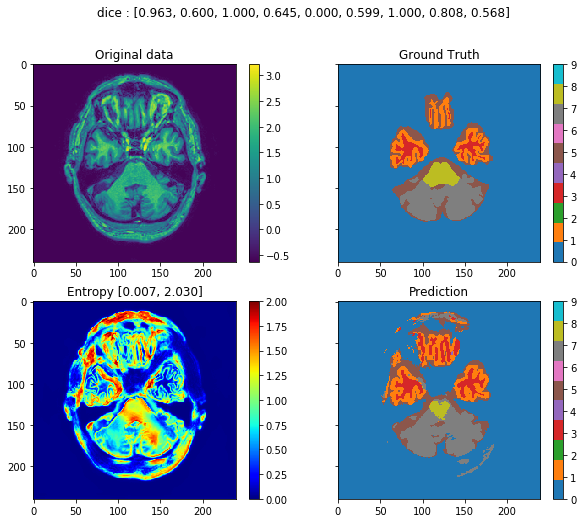

In [8]:
import numpy as np

ids = np.random.randint(operation.val_data.__len__(), size=1)
show_result(operation.val_data, [10])
# show_result(operation.val_data, range(len(operation.val_data)))

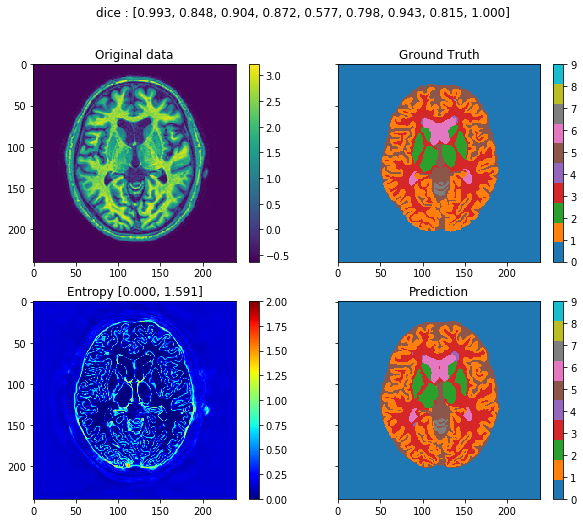

In [7]:
import numpy as np

ids = np.random.randint(operation.val_data.__len__(), size=1)
show_result(operation.val_data, [20])

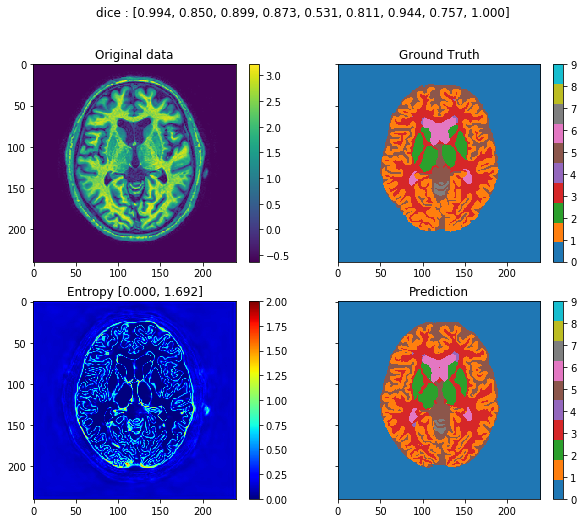

In [6]:
import numpy as np

ids = np.random.randint(operation.val_data.__len__(), size=1)
show_result(operation.val_data, [20])

In [8]:
import numpy as np
def entro(p1, p2):
    return -(p1 * np.log(p1) + p2 * np.log(p2))

In [12]:
print(entro(0.99, 0.01))

0.056001534354847345


In [10]:
print(entro(0.5, 0.5))

0.6931471805599453
